# Session 2a: Image processing using Python
*IMPRS - Using Python for Cognitive Science (2022). This tutorial is made by Noor Seijdel and is partly based on work by [Lukas Snoek](https://lukas-snoek.com/) and [Sophie Slaats](https://www.mpi.nl/people/slaats-sophie), and on the [Pillow tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html).*

Welcome! In this week you will learn how to use Python for image processing. In the past weeks you have become familiar with basic Python syntax and constructs and some Python packages. In this week, we will discuss digital image processing using Jupyter notebooks. 

After this session you will know:
- What a Jupyter notebook is, and how you can use one
- How to open and save image files
- How to resize, crop, copy, move, rotate or overlay images
- How to convert an image to a different file format 

Doing these things will help to improve your Python skills and will demonstrate how to prepare images for your experiments. 

### 1. Before we begin.. what is a Jupyter notebook?
As you can see, you are currently looking at a file with a ".ipynb" extension, instead of the ".py" files we worked with in the previous weeks. This means you're looking at a Jupyter notebook file. Jupyter notebooks (previously called "IPython Notebooks, hence "ipynb") are a kind of editor from which you can run Python code. 

##### 1.1 Code cells 
The nice thing about these notebooks is that you can mix text cells (such as the one you are reading now) with code cells. Similar to code sections in R (indicated using  "#") or in MATLAB (using "%%") using code cells allows you to run only a part of your code. Let's look at a code cell:




In [1]:
# This a code cell. You can edit this code cell, and run it by clicking the "play sign" or by pressing shift+enter. 
# Try to print your own name below:

my_name = "Christina "
print("My name is " + my_name)



My name is Christina 


##### 1.2 Text cells
Text is written in so-called "markdown cells". Markdown cells accept plain text and can be formatted using special Markdown syntax. For example: 

\# One hash creates a large header \
\## Two hashes creates a slightly smaller header (this goes up to four hashes)

Bold text can be created by enclosing text in **double asterisks** (\*\* like this \*\*) and italicized text can be created by enclosing text in *single asterisks* (\* like this \*). You can even include URLs and insert images from the web; check this [link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for a cheatsheet with markdown syntax and options! All the special markdown-syntax and options will be converted to readable text after running the text cell (again, by pressing the "play" button or by Shift+Enter).

Double-click on the markdown cell below and type some sentences to try it out! Formatting happens when you run the cell  (click the "play" button or Shift+Enter).

##### 1.3 Inline visualization
Another nice feature of Jupyter notebooks is that you can look at images or generate plots in the same notebook. For example, you can load an image you have on your computer, and visualize it in your notebook directly. This makes notebooks particularly useful for demos or when you want to explore and plot your data. Try it out by running (click the "play" button or Shift+Enter) the next cell.

**NB**: change the folder so that it matches your local folder structure first!

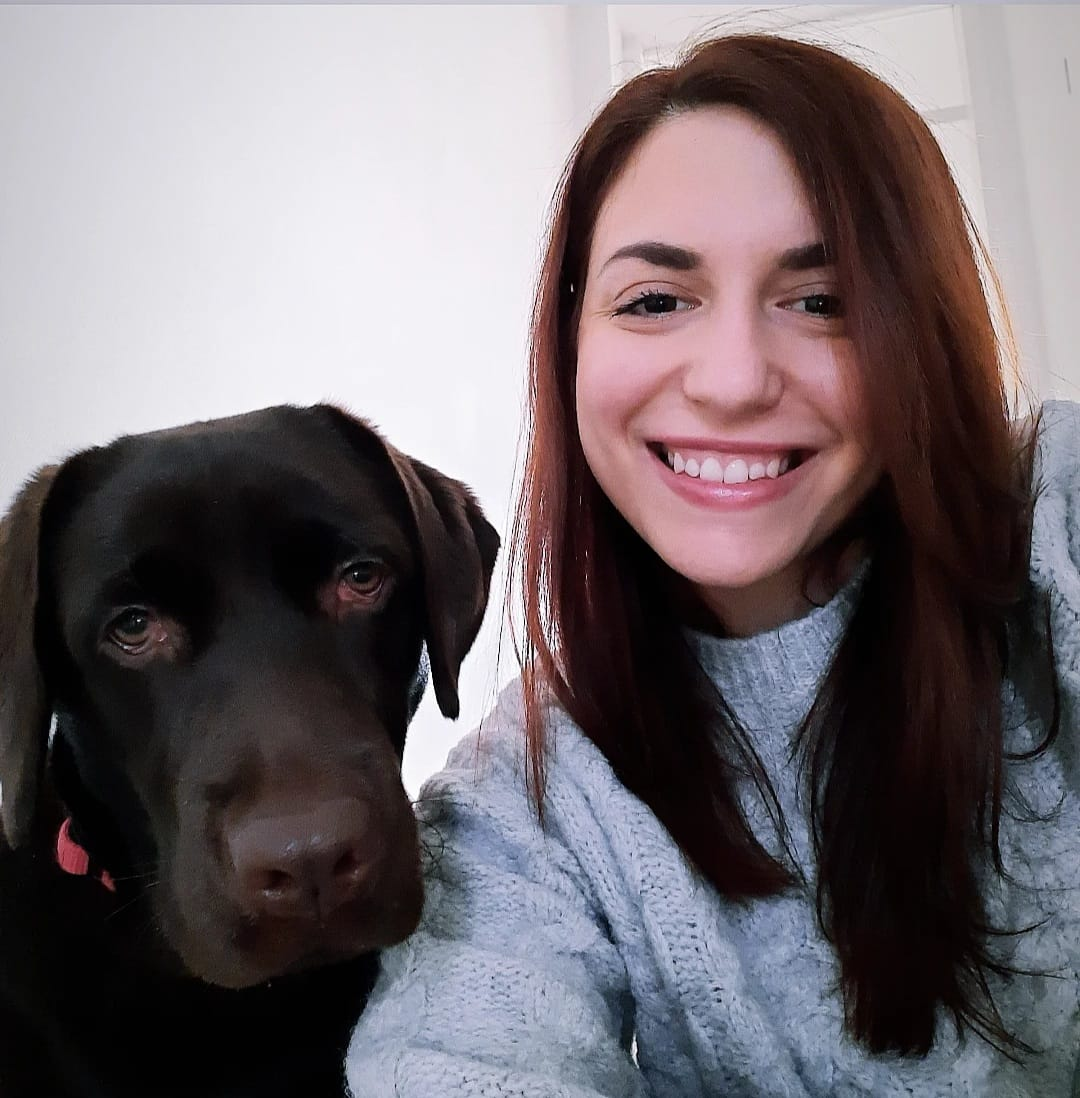

In [7]:
# import some packages
import os
from PIL import Image 

# load an image from file
test_img = Image.open("C:\\Users\\Christina Papoutsi\\Desktop\\photo.jpeg")
display(test_img)

Alternatively, if you prefer to display the image on an external viewer, you can use the show() method. This displays the image in an external window, using an external image viewer (usually Preview on macOS, xv on Unix, and the Paint program on Windows). Try it out:

In [2]:
test_img.show()

Alright. So we've shown you how to edit text cells and code cells, and how to run them. 

<font color='green'>**Exercise 1**</font>
 Now let's see if you can figure out yourself how to insert a new code cell and a markdown cell below. 
 - Use the code cell to calculate `32123 - 12321`  
 - In the markdown cell, try to write some words in **bold** and some in *italic*. 


 


In [3]:
32123 - 12321

19802

**Hello everyone!** My name _Christina_

<font color='green'>**Exercise 2**</font> Sometimes, you accidentally insert the wrong cell type, or you accidentally change the cell type from "code" to "markdown" (or vise versa). To change it back, you can click on the three dots that appear at the top right when you are editing a cell, and click "Change Cell to ..". Try it out! Change the following code cell, which contains markdown, into a markdown cell:

This is a code cell, but it contains markdown, **oh no**!

If you want, have a look at all the other icons to see what they do. 

### 2. Image processing
Now that you've had your first contact with Jupyter notebooks - let's talk about about image processing.

##### 2.1 What is an image?
An image, digital image, or still image is a binary representation of visual information, such as drawings, pictures, graphs, logos, or individual video frames. An image is composed of picture elements, also known as pixels, each with a value for its intensity or gray-level. 

There are two ways a digital image can be encoded: 
- Bitmap images (.jpeg, .gif, ,.png)
- Vector images (.svg, .eps, .ai)

Today, we will focus on Bitmap images. 

##### 2.2 Bitmap images
Bitmap images (also known as raster images) are made up of pixels in a grid. Pixels are picture elements; tiny dots of individual colour that make up what you see on your screen. Pixels are defined by 2 properties: their *position* on the picture/grid and their *colour value*. These properties are stored in a bitmap file for every single pixel in the picture. This means that images are actually arrays (do you remember arrays?) of binary numbers. The more bits (the longer the binary number), the more colours that can be encoded.



##### 2.3 Image processing libraries - Pillow
If you are doing your image processing with Python, there are various libraries you could use. Some popular ones are OpenCV, scikit-image, Python Imaging Library and Pillow. We won't discuss which image processing library is the best here; they all have their merits. This module will focus on Pillow, a powerful library that provides a wide array of image processing features and is simple to use. 

Pillow is a fork of the Python Imaging Library (PIL). PIL is a library that offers several standard procedures for manipulating images. It's a powerful library but hasn't been updated since 2009 and doesn't support Python 3. Pillow builds on this, adding more features and support for Python 3. It supports a range of image file formats such as PNG, JPEG, PPM, GIF, TIFF, and BMP. We'll see how to perform various operations on images such as cropping, resizing, adding text to images, rotating, greyscaling, etc., using this library.

##### 2.4 Locating the images 

Before we can work with and edit images, the system needs to know where we've stored them. If you have correctly forked and cloned this week's repository, you should have a folder with images located in your repository. You can use those images for the exercises. However, if you want to play around with your own images, feel free to use those!  

In [4]:
# Let's print the current working directory using the os module. Works for UNIX, Windows, MacOs...
# e.g, to get your current working directory, you can use:
os.getcwd()

'C:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing'

Let's list the images in our image folder:

In [5]:
# define the folder containing the images and list the images
# Don't forget to change this folder 
img_folder = "c:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\raw"
img_list = os.listdir(img_folder)
print(img_list)
# display(img_list)

['baby.jpg', 'bell.jpg', 'bird.jpg', 'car.jpg', 'cat.jpg', 'chicken.jpg', 'clock.jpg', 'cow.jpg', 'cricket.jpg', 'dog.jpg', 'duck.jpg', 'frog.png', 'goat.jpg', 'gun.png', 'hammer.jpg', 'keyboard.jpg', 'motorcycle.jpg', 'mpi.jpg', 'owl.jpg', 'rooster.jpg', 'scissors.jpg', 'sheep.jpg', 'snake.jpg', 'train.jpg', 'whistle.png']


As you can see, we have a nice set of images containing different animals and objects. Let's start by loading in one of the images from file

##### 2.5 Loading an image from file

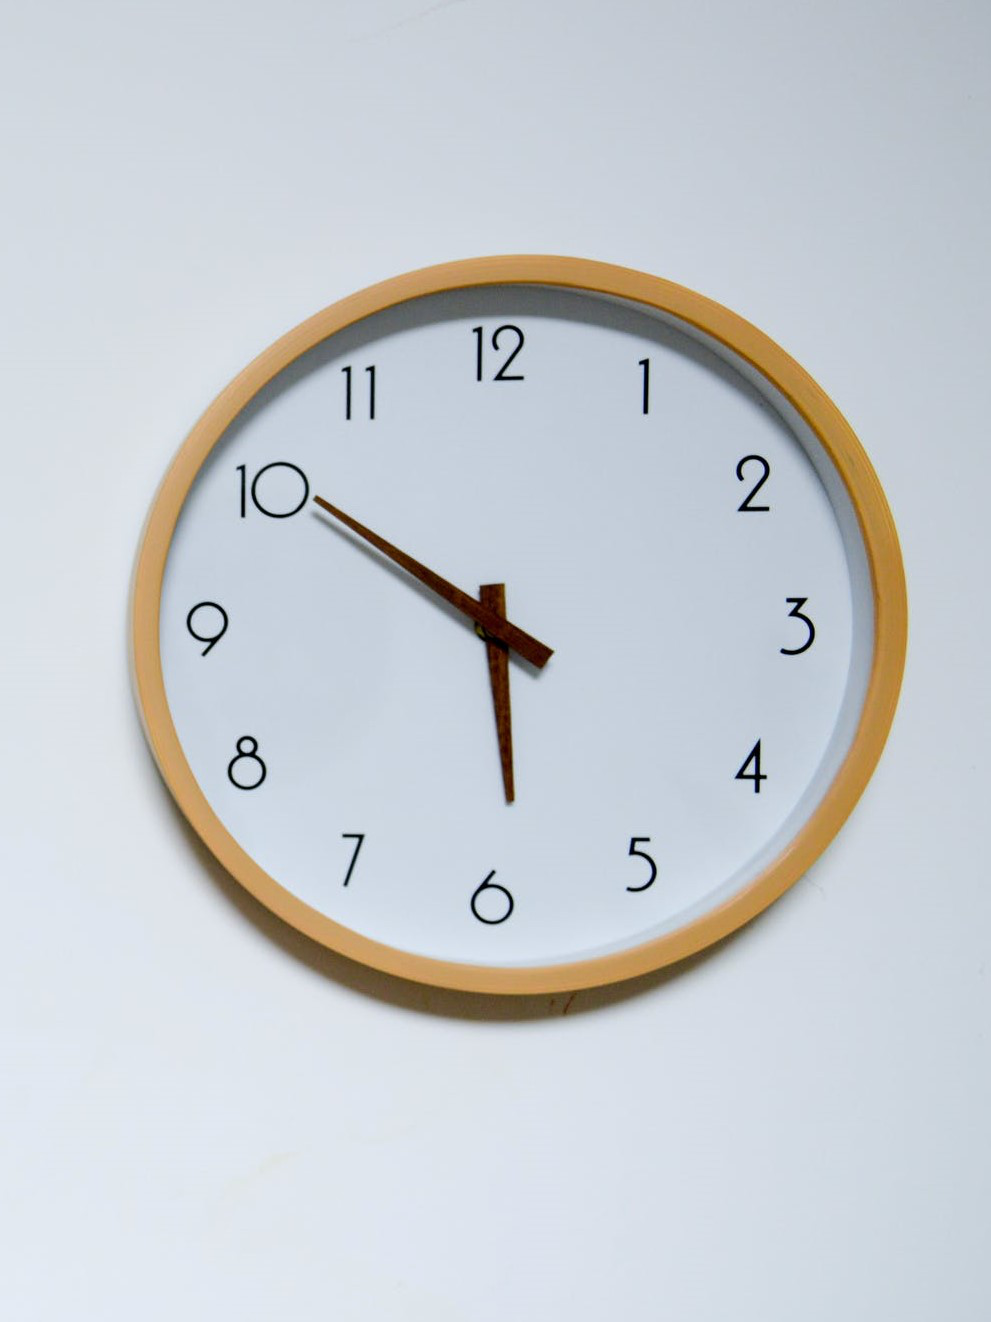

In [6]:
img_path = os.path.join(img_folder,'clock.jpg')
img = Image.open(img_path)
display(img)

Because of using 'Image' from Pillow, the variable 'img' is now of class 'Image'.
What a class is, we will discuss later. For now, it is only necessary to know that a class has ATTRIBUTES. 'Image' has attributes like 'format' ['size'](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#size), and ['mode'](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes). Let's see what that means by printing some of those attributes: 


In [7]:
print(img.size)

(991, 1322)


<font color='green'>**Exercise 3**</font> Find out what is the mode and format of "img" by printing them in the code cell below: 

In [8]:
# This is a code cell

print(img.mode)
print(img.format)


RGB
JPEG


The format attribute identifies the source of an image. If the image was not read from a file, it is set to None. 

The size attribute is a 2-tuple containing width and height (in pixels). 

The mode attribute defines the number and names of the bands in the image, and also the pixel type and depth. Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images. Once you have an instance of the Image class, you can use the methods defined by this class to process and manipulate the image. 

For example, let’s display the image we just loaded.

<font color='green'>**Exercise 4**</font> Display the image below (you can choose if you want to do this *within the notebook* or using an *external viewer*)


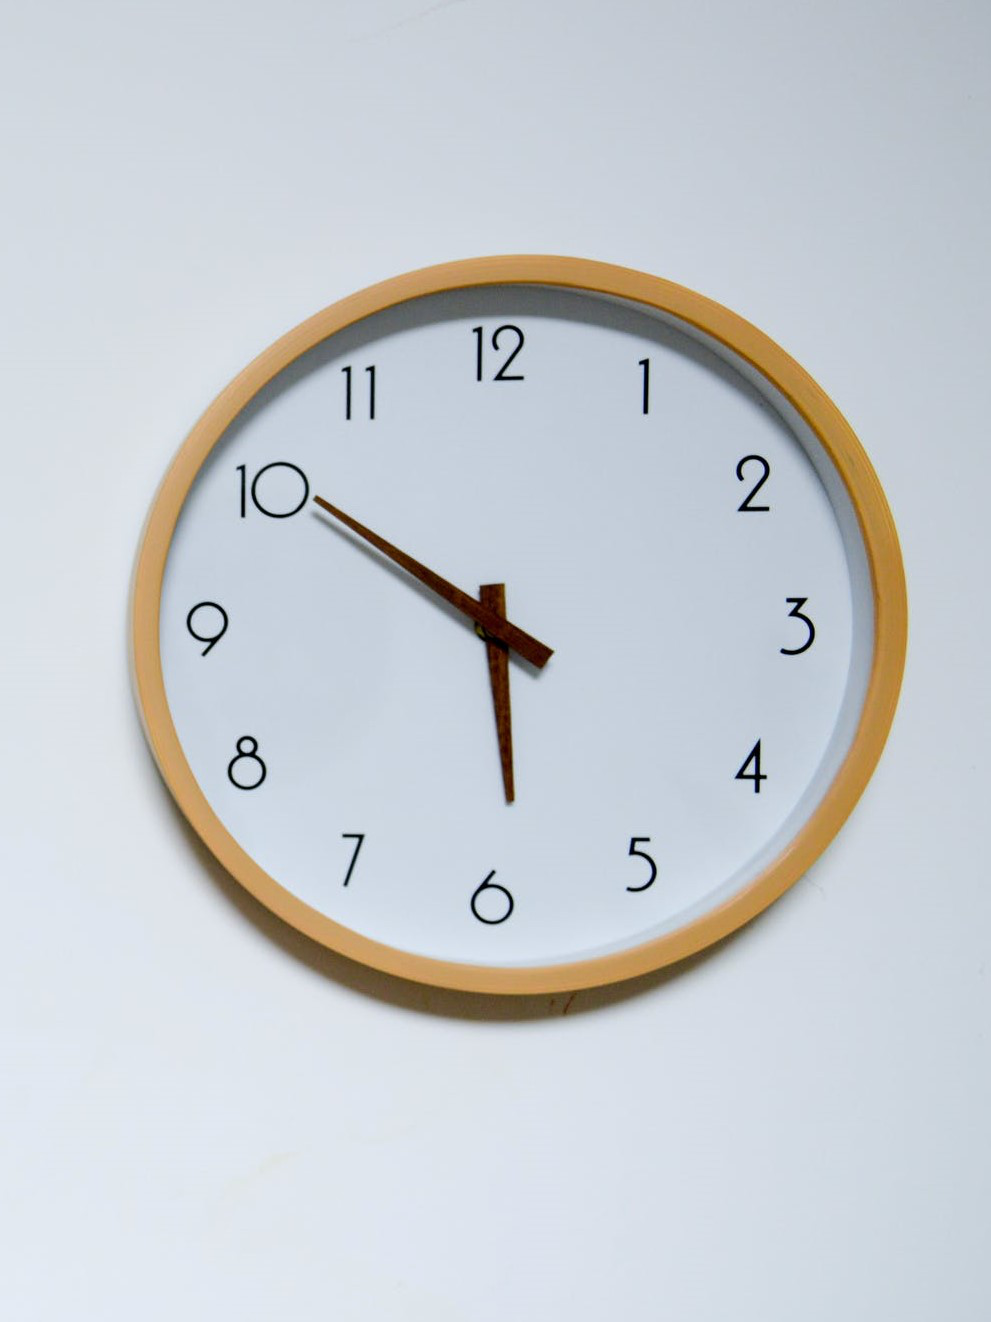

In [9]:
# use this code cell to display the image 

display(img)


img.show()



##### 2.6 Changing the image format

Pillow supports a wide variety of image file formats. You don’t have to know the file format to open a file, as the library automatically determines the format based on the contents of the file. To save a file, you can use the save() method of the Image class. When saving files, the name becomes important. Unless you specify the format, the library uses the filename extension to discover which file storage format to use. 

Let's see what that means, by saving the image to a new file extension. To do this, we will first need to split the extension (".jpg" in our case) and the name, using os.path.splitext:

In [10]:
# first: split the extension and the name using os.path.splitext
# N.B.: the function os.path.split() splits the path to the folder from the filename.
filename, extension = os.path.splitext(img_path)
print(filename)


c:\Users\Christina Papoutsi\IMPRS-Python-course-session1\session2a-imageprocessing\raw\clock


Now, we can generate the filename with a ".png" extension and save the file: 

In [17]:
# generate new filename
outfile = filename + ".png"

# save the file
img.save(outfile, "PNG")

# note that you can also change the name and save the file again.
new_img_path = os.path.join(img_folder, "a_Python_will_eat_this_bird.png")
img.save(new_img_path)

Hopefully that worked! Check it out by having a look at your image folder. 

While this is nice, you might want to save your images in a different folder so that you can send the correct version of the images to your colleague. Let's see if we can delete the files and save them to a new folder instead: 


In [18]:
# delete the files 
os.remove(outfile)
os.remove(new_img_path)

# make a new folder
new_folder = "c:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\edited_images" #Make sure this folder corresponds to your own folder structure!
os.mkdir(new_folder)

# save the file
img.save(os.path.join(new_folder, "clock.png"))


<font color='green'>**Exercise 5**</font> Copy all the .jpg files as .png to the new folder. If you want, you can use a for-loop (hint: we have a list of the images stored in "img_list")


In [19]:
# Use this code cell 

for image in img_list:
    img_path = os.path.join(img_folder, image)
    image, extension = os.path.splitext(image)
    print(image)
    outfile = image + ".png"
    img = Image.open(img_path)
   # img.save(outfile, "PNG")
    img.save(os.path.join(new_folder, outfile))




    #img = image + ".png"
    #img.save(img, "PNG")


baby
bell
bird
car
cat
chicken
clock
cow
cricket
dog
duck
frog
goat
gun
hammer
keyboard
motorcycle
mpi
owl
rooster
scissors
sheep
snake
train
whistle


##### 2.7 Editing your images 

The Image class also contains methods allowing you to manipulate regions within an image. For example. to extract a sub-rectangle from an image, you can use the crop method:

**2.7.1 Cropping**


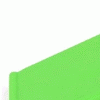

In [20]:
# cropping an image, coordinates: (left upper / right lower)
reg = (50, 50, 150, 150)  # random square, in pixels
img_crop = img.crop(reg)
display(img_crop)
img_crop.show()

# now you can save this if you want
img_crop.save(os.path.join(new_folder, "cropped_image.png"))

**2.7.2 Resizing**

We can also resize the image:

(367, 275)
(400, 400)


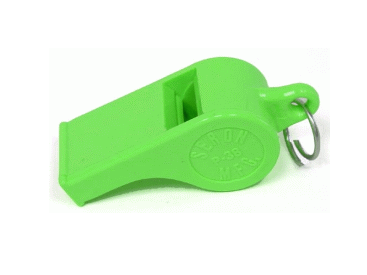

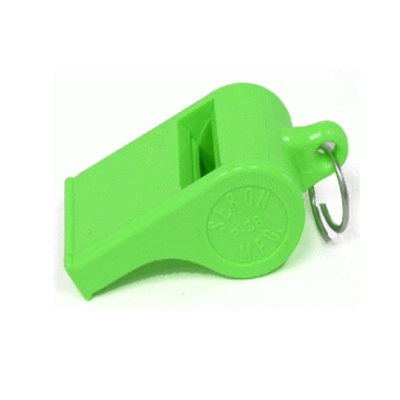

In [21]:
img_400 = img.resize((400, 400))
img_400.save(os.path.join(new_folder,'image_400.jpg'))

print(img.size) # Output: (1920, 1280)
print(img_400.size) # Output: (400, 400)

display(img)
display(img_400)

If you want to resize the image and keep the aspect ratios as it is, then you can use a thumbnail() function to resize it instead of the resize() function.
This also takes a two-integer tuple argument representing a maximum width and the maximum height of the thumbnail. It is important to note that this function modifies the Image object in place. If you need to use the full resolution (original) image as well, you can apply this method to a copy() of the original image:

(367, 275)
(367, 275)


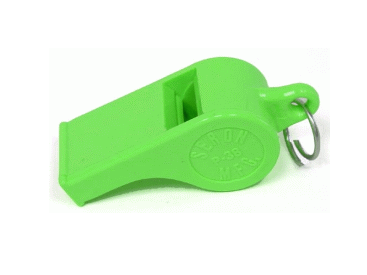

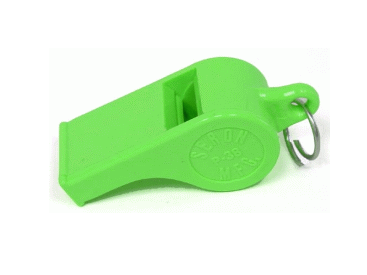

In [23]:
img_thumb = img.copy() #Make a copy of the image
img_thumb.thumbnail((400, 300))

print(img.size) # Output: (1920, 1280)
print(img_thumb.size) # Output: (400, 400)

display(img)
display(img_thumb)


We could also flip the cropped region of the image, paste it back on the image and resize the image: 

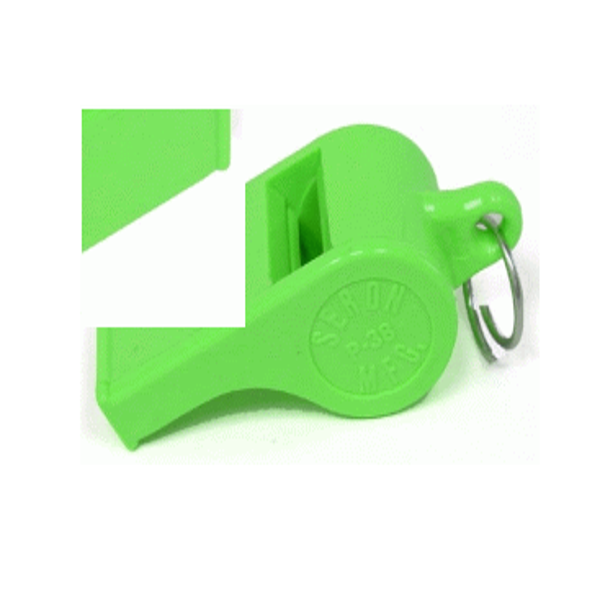

In [24]:
# we could also flip it and paste it back
img_crop = img_crop.transpose(Image.ROTATE_180)
img.paste(img_crop, reg) # this directly edits the img variable!

img_600 = img.resize((600, 600))

display(img_600)


What if we want to crop the image such that it is the largest square it can be (given the original image size)?

In [29]:
# get the width and height of the image
width = img.width
height = img.height

# to create a square
distance_from_center = min([width, height])/2
print(distance_from_center)
center = (width/2, height/2)
print(center)

left = []
right = []

for number in center:
    left.append(number - distance_from_center)
    right.append(number + distance_from_center)

img_square = img.crop((left[0], left[1], right[0], right[1]))
img_square.show()

137.5
(183.5, 137.5)


Using the `crop` and `paste` methods, we can also "roll" an image. Let's see what I mean by that: 

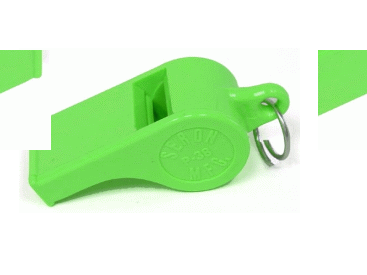

In [ ]:
# Here we define a function "roll" that takes "image" and "delta" as arguments, and returns the "rolled" image
def roll(image, delta):
    """Roll an image sideways."""
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0:
        return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize - delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize - delta, ysize))

    return image


# Here we call the function, using our "img" and delta=600
roll(img,delta=600)

As you can see, we can do whatever we want to the image! However, when pasting regions back, the size of the region must match the given region exactly. In addition, the region cannot extend outside the image. The modes of the original image and the region do not need to match. If they don’t, the region is automatically converted before being pasted.

**2.7.3 Converting to greyscale**

PThe Python Imaging Library allows you to convert images between different pixel representations using the convert() method:


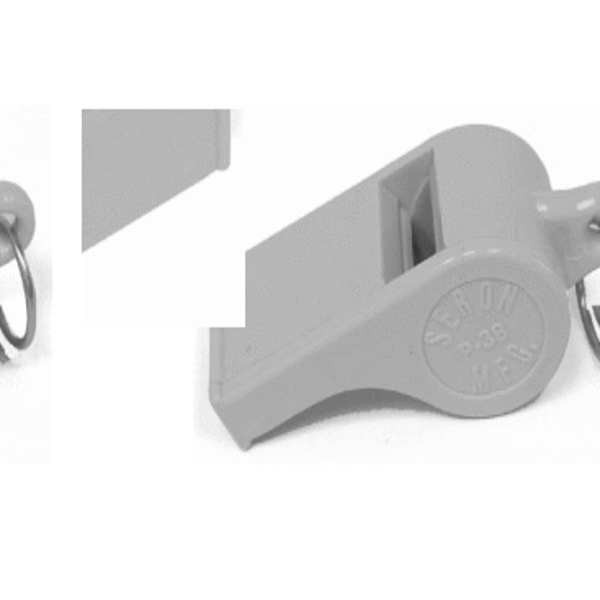

In [ ]:
# converting between modes
blw = img_600.convert("L")
display(blw)


<font color='green'>**Exercise 6**</font> Load the "clock.jpg" image, and crop it so that you only see the number "6"

(400, 300)
(400, 600)


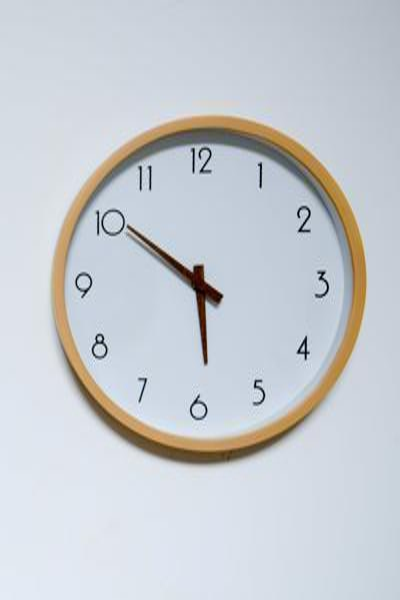

In [14]:
# Use this code cell

clock_img = Image.open("C:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\raw\\clock.jpg")
#display(clock_img)
print(clock_img.size)
clock_img_400 = clock_img.resize((400, 600))
print(clock_img_400.size)
display(clock_img_400)




# cropping an image, coordinates: (left upper / right lower)
img_crop = clock_img_400.crop((150, 375, 250, 430))
img_crop.show()

# now you can save this if you want
img_crop.save(os.path.join(new_folder, "cropped_clock6.png"))


Okay! So far we've seen a couple ways to edit and process images using Python. Pillow provides many more methods and modules that can be used to process image. You can find more on: https://pillow.readthedocs.io/en/stable/index.html. 



<font color='yellow'>**Homework assignment**</font> 

For this week's assignment, we want you to create a new folder called "processed" where all images from "raw" are stored in .png. All images need to be cropped to ratio 4:3 (or 3:4) and resized to be all the same size. 

*Important:*

0. There are different extensions
1. They are all different sizes
2. We have portrait and landscape orientated images


*Steps:*

0. Create a new folder
1. Define portrait and landscape images
2. Figure out on which side you have to crop the image
3. Crop the image
4. Resize the image
5. Save it to your new folder with the new extension. That's it!

In [9]:
# Assignment:

# Create a new folder "processed"

new_new_folder = "c:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\processed" #Make sure this folder corresponds to your own folder structure!
os.mkdir(new_new_folder)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'c:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\processed'

In [10]:
img_folder = "c:\\Users\\Christina Papoutsi\\IMPRS-Python-course-session1\\session2a-imageprocessing\\raw"
img_list = os.listdir(img_folder)
#print(img_list)
images_list = [] 

for img in img_list: 
#     print(img)
    img_path = os.path.join(img_folder, img)
    image = Image.open(img_path)
    width, height = image.size
    center_x, center_y = width/2, height/2 #centre always the same regardless of image orientation
    if width > height: #if image is landscape 
        cropped_height = height
        cropped_width = 0.75 * cropped_height #0.75 because it is a 3:4 aspect ratio
        top_left_x = center_x - cropped_width/2
        top_left_y = center_y - cropped_height/2
        bottom_right_x = center_x + cropped_width/2
        bottom_right_y = center_y + cropped_height/2
        img_cropped = image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
#         img_cropped.show()
    else: #if image is portrait 
        cropped_width = width
        cropped_height = 0.75 * cropped_width #0.75 because it is a 4:3 aspect ratio
        top_left_x = center_x - cropped_width/2
        top_left_y = center_y - cropped_height/2
        bottom_right_x = center_x + cropped_width/2
        bottom_right_y = center_y + cropped_height/2
        img_cropped = image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
#         img_cropped.show()
#     image_thumb = img_cropped.copy()
    # image_thumb.thumbnail((600, 600))  #I keep the aspect ratio   with thumbnail()
#     print(image_thumb.size)
#     image_thumb.show()
    # img_resized = img_cropped.resize((img_cropped.size[0] * 2, img_cropped.size[1]  * 2)) #I double the img size keeping the aspect ratio
#     print(img_resized.size)
    image_resized = img_cropped.copy()
    img_resized =  image_resized.resize((600,600))

    
    image_name, extension = os.path.splitext(img)
    outfile = image_name + "_cropped_and_resized" + ".png"
    
#     print(image_name, extension)
    image_full_path = os.path.join(new_new_folder, outfile)
    images_list.append(img_resized)

#     img_resized.save(image_full_path)



<font color='Pink'>**Bonus**</font>  If you have time, try to create an animated GIF from multiple images and save it using Image.save(). 

In [11]:
images_list[0].save(os.path.join(new_new_folder, "out.gif"), save_all=True, append_images=images_list[1:])  #